In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/evelyn/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
df_raw = pd.read_pickle('sample.pickle')
n, m = df_raw .shape

In [5]:
df_raw.isnull().sum()/n*100
# the target "timestamp_at_install" has 83% Nan rate
# we should not use city, time_of_last_delivery_any_installed_app, time_of_last_delivery_this_creative

advertiser_app_store_id                     0.000000
country_code                                0.036509
city                                       96.572509
campaign_id                                 0.000000
creative_id                                 0.000000
device_language                             0.008981
device_make                                 0.025045
device_model                                0.025849
device_platform                             0.000000
device_connection                           5.956926
device_os_version                           0.000000
device_screen_height                        0.000000
device_screen_width                         0.000000
device_volume                               0.000000
event_id                                    0.000000
n_campaign_views                            0.000000
n_vungle_installs                           0.000000
publisher_app_store_id                      0.000000
time_of_last_delivery_this_campaign        36.

In [6]:
df_raw.dtypes

advertiser_app_store_id                    object
country_code                               object
city                                       object
campaign_id                                object
creative_id                                object
device_language                            object
device_make                                object
device_model                               object
device_platform                            object
device_connection                          object
device_os_version                          object
device_screen_height                       object
device_screen_width                        object
device_volume                              object
event_id                                   object
n_campaign_views                           object
n_vungle_installs                          object
publisher_app_store_id                     object
time_of_last_delivery_this_campaign        object
time_of_last_delivery_this_creative        object


In [7]:
df_raw.apply(lambda x: x.nunique(), axis=0)

advertiser_app_store_id                        948
country_code                                   223
city                                         11202
campaign_id                                   4275
creative_id                                  13193
device_language                                113
device_make                                   4017
device_model                                 30416
device_platform                                  3
device_connection                                2
device_os_version                              213
device_screen_height                          1048
device_screen_width                           1342
device_volume                                48836
event_id                                   1361497
n_campaign_views                               576
n_vungle_installs                               61
publisher_app_store_id                       12794
time_of_last_delivery_this_campaign         637846
time_of_last_delivery_this_crea

In [8]:
df_raw.describe()

,advertiser_app_store_id,country_code,city,campaign_id,creative_id,device_language,device_make,device_model,device_platform,device_connection,...,n_vungle_installs,publisher_app_store_id,time_of_last_delivery_this_campaign,time_of_last_delivery_this_creative,time_of_last_delivery_any_installed_app,time_of_last_vungle_delivery,time_of_this_impression,timestamp_at_install,time_of_this_request,time_zone
count,1369515,1369015,46940,1369515,1369515,1369392,1369172,1369161,1369515,1287934,...,1369515.0,1369515,866352,599223,147446,1324194,1369515,231909,1369515,1369093
unique,948,223,11202,4275,13193,113,4017,30416,3,2,...,61.0,12794,637846,488930,140011,735970,628676,188432,674102,415
top,5743f032a5a36ff4300000a5,US,Jakarta,577a28b8b7456617690000a5,58465caf6dea79c175000078,en,samsung,1,android,wifi,...,0.0,580f0e8433c58e460b00008d,2017-01-24 17:26:05,2017-01-24 08:55:11,2017-01-21 20:13:57,2017-01-27 01:46:00,2017-01-27 00:15:35,2017-01-27 04:52:01,2017-01-25 16:42:32,Asia/Shanghai
freq,56698,345367,2419,20660,39541,552800,384000,192131,798495,1013099,...,1221485.0,47520,9,7,5,14,12,12,13,153709


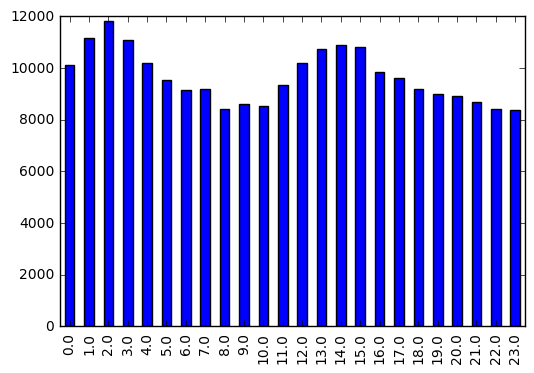

In [9]:
times = pd.DatetimeIndex(df_raw.timestamp_at_install)
df_raw.groupby([times.hour]).timestamp_at_install.count().plot(kind='bar')

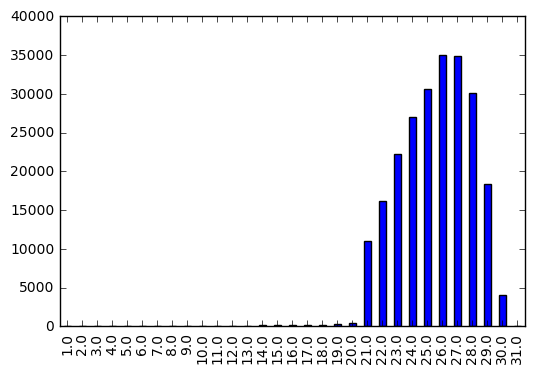

In [10]:
df_raw.groupby([times.day]).timestamp_at_install.count().plot(kind='bar')

In [11]:
df_raw.groupby(["device_os_version"]).timestamp_at_install.count()

device_os_version
10.0                                   177
10.0.0.0                              1170
10.0.1                                1652
10.0.10240.16384                         0
10.0.10240.16397                         4
10.0.10240.16405                         2
10.0.10240.16413                         1
10.0.10240.16430                         0
10.0.10240.16445                         1
10.0.10240.16463                         1
10.0.10240.16487                         3
10.0.10240.16500                         0
10.0.10240.16520                         3
10.0.10240.16549                         1
10.0.10240.16590                         0
10.0.10240.16601                         1
10.0.10240.16644                         2
10.0.10240.16854                         0
10.0.10240.16942                         1
10.0.10240.17024                         0
10.0.10240.17071                         2
10.0.10240.17113                         1
10.0.10240.17146                    

### Create New feature by aggregate same version of OS together

In [59]:
df_raw['os_aggregate'] = df_raw['device_os_version'].str.extract('(\d{1,2}[\.]{1}\d{1,})', expand=True)

In [60]:
df_raw['os_aggregate'].head()

0     5.0
1    10.2
2     4.4
3     5.1
4    10.2
Name: os_aggregate, dtype: object

### Create Boolean for ad seeing history

In [61]:
df_raw['campaign_history']=df_raw['time_of_last_delivery_this_campaign'].isnull()
df_raw['creativ_history']=df_raw['time_of_last_delivery_this_creative'].isnull()
df_raw['creativ_history']=df_raw['time_of_last_delivery_any_installed_app'].isnull()

In [62]:
df_raw['campaign_history'].head()

0    False
1    False
2    False
3     True
4    False
Name: campaign_history, dtype: bool